Question 1:


C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_46008\3036371942.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house_ftse_df.fillna(method='ffill', inplace=True)


              Adj Close  Average House Price  house_returns  ftse_returns
Date                                                                     
1991-02-01  2380.899902         53496.798746       0.008390      0.097037
1991-03-01  2456.500000         52892.861606      -0.011289      0.031753
1991-04-01  2486.199951         53677.435270       0.014833      0.012090
1991-05-01  2499.500000         54385.726747       0.013195      0.005350
1991-07-01  2588.800049         54541.121263       0.002857      0.035727
slope: 0.11009020857106064, intercept: 0.005561212797840313
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2558
Date:                Sun, 13 Oct 2024   Prob (F-statistic):              0.614
Time:                      

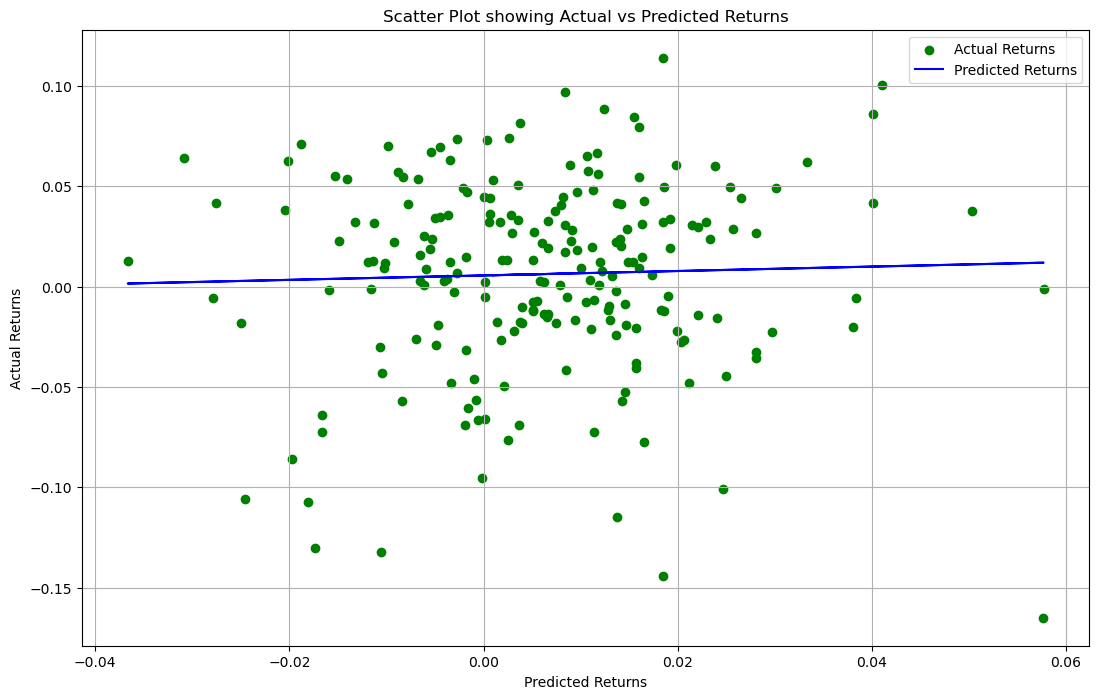

R2 value: 0.0012164661664135767


In [375]:
# to use read_excel function
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt
# to utilize correlation function
import numpy as np
# to utilize the fit (model) function
from sklearn.linear_model import LinearRegression as lr

import statsmodels.api as st

# storing data from data source into respective data frames (both metadata and original data) 
ftse100_df = pd.read_csv('data/FTSE100.csv')
houseprices_df = pd.read_excel('data/Monthly.xls')

ftse100_df['Date'] = pd.to_datetime(ftse100_df['Date'])
houseprices_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
houseprices_df['Date'] = pd.to_datetime(houseprices_df['Date'])
ftse100_df = ftse100_df.drop(columns=['Open', 'Close', 'High', 'Low', 'Volume'])
houseprices_df= houseprices_df.drop(columns=['Seasonally Adjusted Index', 'Monthly % Change (SA)',  'Year % Change', 'Latest 3 months on previous 3 months', 'INDEX Q1 1993=100'])

houseprices_df.set_index('Date', inplace=True)
houseprices_df = houseprices_df[houseprices_df.index <= '2016']
house_ftse_df = pd.merge(ftse100_df, houseprices_df, on='Date')
house_ftse_df.set_index('Date', inplace=True)
house_ftse_df.sort_index(inplace=True)


# print(ftse100_df.head(5))

house_ftse_df.fillna(method='ffill', inplace=True)
# print(house_ftse_df.isnull ().sum())

# define the dependent and independent variables
# taking the last price of each month after resampling
# dp_var = ftse100_df['Adj Close'].resample('M').last()
house_ftse_df['house_returns'] = house_ftse_df['Average House Price'].pct_change()
house_ftse_df['ftse_returns'] = house_ftse_df['Adj Close'].pct_change()

house_ftse_df.dropna(inplace=True)

print(house_ftse_df.head(5))

# Y for the dependent variable
Y = house_ftse_df['ftse_returns'].values
# X for the explanatory variable
X = house_ftse_df['house_returns'].values.reshape(-1,1)

# fitting the model
model = lr()
model.fit(X,Y)

# get coefficients
slope = model.coef_[0]
intercept = model.intercept_
predictions = model.predict(X)

print(f"slope: {slope}, intercept: {intercept}")

X_with_const = st.add_constant(X)
model_stats = st.OLS(Y, X_with_const).fit()

print(model_stats.summary())

# graph configuration
plt.figure(figsize=(13,8))
plt.scatter(X,Y, color='green', label='Actual Returns')
plt.plot(X, predictions, color='blue', label='Predicted Returns')
plt.title("Scatter Plot showing Actual vs Predicted Returns")
plt.ylabel("Actual Returns")
plt.xlabel("Predicted Returns")
plt.grid()
plt.legend()
plt.show()


# get r value
r_squared = model.score(X, Y)
print(f"R2 value: {r_squared}")


# # exp_var = houseprices_df['Average House Price'].resample('M').last()
# m_returns_house = exp_var.pct_change().dropna()

# X= st.add_constant(exp_var)

# model = st.OLS(dp_var, exp_var).fit()

# print(model.summary)





Question 2:


In [280]:
# to utilize the plot function 
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# to utilize the OLS
import statsmodels.api as st 

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression as lr

from sklearn.metrics import mean_squared_error as mse

# reading data from csv file
college_df = pd.read_csv('data/college.csv')
college_df.rename(columns={'Unnamed: 0': 'Institution'}, inplace=True)
# filter useful columns
college_df_filtered = college_df[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc', 'Grad.Rate']]
res= college_df_filtered.corr()
print(res)
college_df_filtered = college_df_filtered.drop(columns=['Grad.Rate'])

# get correlation coefficient between pairs of filtered columns 
# print(college_df[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend']].head(5))

# define dependent variable 
Y = college_df['Grad.Rate']
# define independent variables
X = college_df_filtered

# fit initial model with predictors
# model = lr()
# # using the stepwise model
# rfe = RFE(estimator = model)
# fit= rfe.fit(X, Y)


# # print selected features
# selected_feats =X.columns[fit.support_]
# print("Selected features:", selected_feats.values)

# final model with selected features
final_model = st.OLS(Y,st.add_constant(X)).fit()

# print(model.summary())
print(final_model.summary())

# fit different models
# using the BIC model 
bic_fmodel = final_model.bic
print(f"BIC of full model: {bic_fmodel}")

X=st.add_constant(X)
model_full = st.OLS(Y, X).fit()
# model_reduced = st.OLS(Y, st.add_constant(X[[selected_feats[0]]])).fit()

# comparing different models
print(f"BIC Full Model (5 predictors): {model_full.bic}")
# print(f"BIC Reduced Model (1 useful predictor): {model_reduced.bic}")

bic_values = []
bic_index = []
for i in range(1, X.shape[1]):
    model = st.OLS(Y, X.iloc[:, :i+1]).fit()
    bic_index.append(i)
    bic_values.append(model.bic)
    
best_model_index = np.argmin(bic_values)
# print("Best models based on BIC: ", X) 
print("Best models based on BIC: ", bic_values)
print("Best model based on BIC: ", best_model_index)

# predictions for both models
X_useful = X.drop(columns=['Top10perc'])
model_useful =st.OLS(Y, X_useful).fit()
predictions_full = model_full.predict(X)
predictions_useful = model_useful.predict(X_useful)

# calculate RMSE
rmse_full = np.sqrt(mse(Y, predictions_full))
rmse_useful = np.sqrt(mse(Y, predictions_useful))

print(f"RMSE Full Model: {rmse_full}, RMSE Useful Model: {rmse_useful}")

cmu_df = college_df[college_df['Institution'] == 'Carnegie Mellon University'].copy()
# cmu_df = cmu_df[['Apps', 'Enroll', 'Outstate','Top10perc', 'Top25perc']]
cmu_df = cmu_df[['Apps', 'Enroll', 'Outstate', 'Top25perc']]
cmu_df['const'] = 1.0
model_useful = st.OLS(Y,X_useful).fit()
print(cmu_df.head(1))
print(X_useful.head(1))
predicted_cmu_rate = model_useful.predict(cmu_df)

print(f"Predicted CMU Graduation Rate: {predicted_cmu_rate.values}")




               Apps    Enroll  Outstate  Top10perc  Top25perc  Grad.Rate
Apps       1.000000  0.846822  0.050159   0.338834   0.351640   0.146755
Enroll     0.846822  1.000000 -0.155477   0.181294   0.226745  -0.022341
Outstate   0.050159 -0.155477  1.000000   0.562331   0.489394   0.571290
Top10perc  0.338834  0.181294  0.562331   1.000000   0.891995   0.494989
Top25perc  0.351640  0.226745  0.489394   0.891995   1.000000   0.477281
Grad.Rate  0.146755 -0.022341  0.571290   0.494989   0.477281   1.000000
                            OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     97.00
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.73e-79
Time:                        09:48:39   Log-Likelihood:                -3121.9
No. Observation

Question 3:


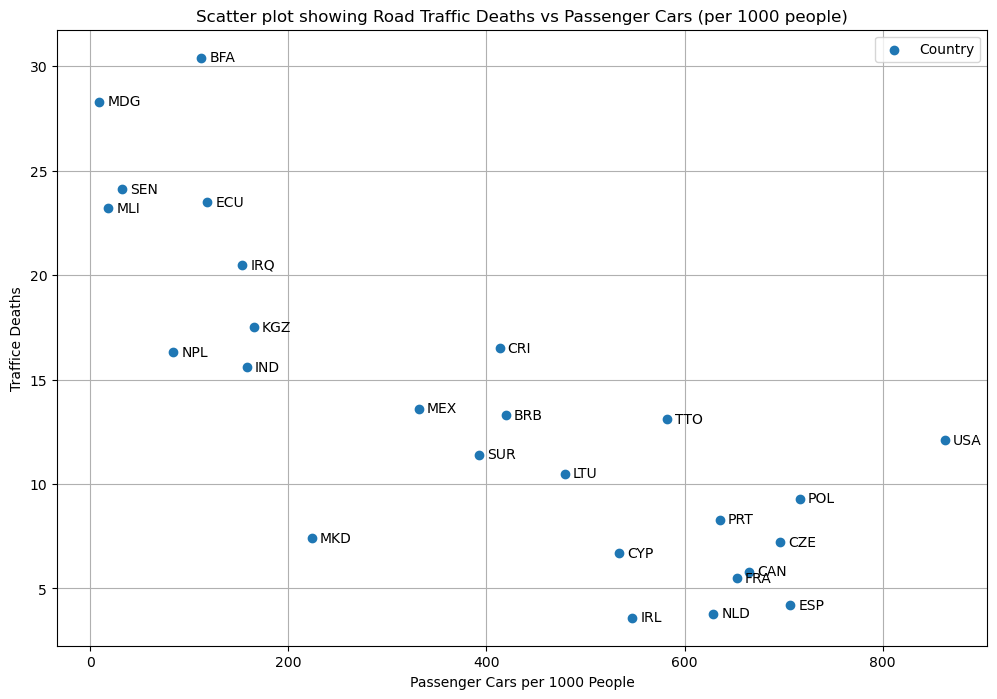

Correlation coefficent: -0.8088205151673584
                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     45.40
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.72e-07
Time:                        20:41:40   Log-Likelihood:                -75.653
No. Observations:                  26   AIC:                             155.3
Df Residuals:                      24   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [374]:
# to utilize the read_excel function
import pandas as pd

# to plot graphs
import matplotlib.pyplot as plt

import statsmodels.api as st

# read data from file
drate_df = pd.read_csv('data/death_rate_road.csv')
rvehicles_df = pd.read_csv('data/registered_vehicles.csv')

# print(drate_df.head(5))
# print(rvehicles_df.head(5))
drate_df = drate_df.rename(columns={'3.6.1 - Death rate due to road traffic injuries, by sex (per 100,000 population) - SH_STA_TRAF - Both sexes': 'Deaths'})
drate_df.drop(columns=['Entity'], inplace=True)
drate_df = drate_df[drate_df['Year'] == 2015]
# print(drate_df)

rvehicles_df = rvehicles_df.rename(columns={'Registered vehicles per 1,000 people': 'Vehicles'})
rvehicles_df.drop(columns=['Entity'], inplace=True)
rvehicles_df = rvehicles_df[rvehicles_df['Year'] == 2015]
# print(rvehicles_df)

dr_rv_df= pd.merge( rvehicles_df,drate_df, on='Code')
# dr_rv_df.drop(columns=['Year'], inplace=True)

# print(dr_rv_df)

plt.figure(figsize=(12,8))
plt.title('Scatter plot showing Road Traffic Deaths vs Passenger Cars (per 1000 people)')
plt.scatter(dr_rv_df['Vehicles'], dr_rv_df['Deaths'], marker='o', label="Country")
# plt.plot(X, future_df['predicted_deaths'], color='red', label='Predictions for 2021')
plt.xlabel('Passenger Cars per 1000 People')
plt.ylabel('Traffice Deaths')
for index, row in dr_rv_df.iterrows():
    plt.annotate(row['Code'], (row['Vehicles'], row['Deaths']), fontsize=10, ha='left', xytext=(8,-4), textcoords='offset pixels')
plt.grid()
plt.legend()
plt.show()


#  
correlation = dr_rv_df['Vehicles'].corr(dr_rv_df['Deaths'])
print(f"Correlation coefficent: {correlation}")

# define independent and dependent variables
X = dr_rv_df['Vehicles']
Y = dr_rv_df['Deaths']

# constant for intercept
X = st.add_constant(X)

# fit regression model
model = st.OLS(Y, X).fit()
print(model.summary())

# predicting traffic death
# predictions = model.predict(X)
# dr_rv_df['predicted_deaths'] = predictions

# print(dr_rv_df[['Deaths', 'Vehicles', 'predicted_deaths']])

# assuming a 2% increase of vehicles in 2021 
projected_cars_per_1000 = dr_rv_df['Vehicles'] * (1+0.02) ** (2021 - 2015) 

# 
future_df = pd.DataFrame({
                        'Code': dr_rv_df['Code'],
                        'projected_vehicles': projected_cars_per_1000
                        })

# 
future_x = st.add_constant(future_df['projected_vehicles'])
future_df['predicted_deaths'] = model.predict(future_x)

# display predictions
print(future_df[['Code','projected_vehicles', 'predicted_deaths']])

print(future_df[['predicted_deaths']])




Question 4:


In [349]:
# to utilize the read_excel function
import pandas as pd
# to utilize the arange function
import numpy as np
# to configure and plot graphs
import matplotlib.pyplot as plt

import statsmodels.api as st

# save data from file into dataframe
unemployment_df = pd.read_csv('data/israeli_unemployment_rate.csv')

unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date']).dt.year
# filter the dataframe
unemployment_df = unemployment_df[unemployment_df['Date'] < 2013]
# print(unemployment_df.tail(5))

# print(np.asarray(unemployment_df))

# define independent variable and dependent variable
X = unemployment_df['Date']
# dependent variable
Y = unemployment_df['Value']

# add a constant to the model (intercept)
X = st.add_constant(X)

# fitting the model
model = st.OLS(Y,X).fit()

# predict graduation rate for the year 2020
pred_2020 = pd.DataFrame({'const':[1], 'Year': [2020]})
pred_rate_2020 = model.predict(pred_2020)

print(f"Predicted Graduation Rate for the year 2020: {pred_rate_2020[0]:.2f}")

# evaluate accuracy of the model by getting model summary
# calculate the R2 value using model summary
print(model.summary())

actual_rate_2020  = 12.0
accuracy = (1 - abs(pred_rate_2020[0] - actual_rate_2020) / actual_rate_2020) * 100

print(f"Accuracy as %age: {accuracy:.2f}%")


Predicted Graduation Rate for the year 2020: 12.08
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     12.81
Date:                Sun, 13 Oct 2024   Prob (F-statistic):            0.00116
Time:                        19:48:54   Log-Likelihood:                -70.831
No. Observations:                  33   AIC:                             145.7
Df Residuals:                      31   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c